#### Author: Leonardo Matone

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Project Goals: Analyzing Congressional Voting Patterns and Trends

Congress has increasingly become more polarized and complicated in recent decades, and these preliminary investigations are a testament to that. Understanding and quantifying politicians specifically contextualized against one another could be a useful tool towards understanding where politicians lie (no pun intended), and how they can be described. I will most likely be exmaining Congressional voting patterns. My hope is that I can find patterns in how representatives vote, and predict things about unknown representatives simply based on their voting or how they compare quantitatively to their colleauges. I have selected three preliminary datasets which I hope can provide some clarity for my direction. Not included here is a dataset containing political tweets, a stretch goal of mine is to use the tweets of representatives coupled with a little NLP to predict some dimension of their character, like political party or some polarization metric.

The main goal of this project is to make large-scale politics more digistible. I've done some work on this in the past ([New York Data Project](https://github.com/V993/LegislativeDataAnalytics)) but never in a learning capacity (i.e. machine learning). My work will be centered in this [website](https://v993.github.io/) .


#### Work plan:

I plan to meet (with myself) twice a week to dive into the project and finalize my project vision. Over the next week I want to clearly definte my objectives and experiment with other data sources before continuing. I'll be maintaining a list of to-dos to keep myself on-track. I'll be using Visual Studio Code, JupyterNotebook, GitHub (for personal accounting and the website of course) and Python to investigate my chosen sources of data. 

### Data/Resources:

I have found three sources of congressional data to investigate so far, but I do hope to find more. My sources are from Kaggle, and can be loaded into a dataframe with ease as they are .csv in format:

1. [Political Polarization of Congress](https://www.kaggle.com/code/justin2028/political-polarization-us-congress-data-analysis/input) (from [original source](https://www.kaggle.com/datasets/justin2028/political-polarization-in-us-congress/data))
- Is there a relationship between the age of a representative and their polarity?
- Is there a particular demographic which a highly polarized representative may appeal to?
2. [Congress’ Voting Patterns for/against Trump](https://www.kaggle.com/datasets/fivethirtyeight/trump-score)
- Can we predict party or polarization from voting patterns for/against Trump? 
- Can we estimate polarity from voting patterns?
3. [Election, COVID, and Demographic Data by County](https://www.kaggle.com/datasets/etsc9287/2020-general-election-polls)
- Is there are correlation between counties which voted for Trump and representatives who vote with him?

### ETL [Political Polarization in Congress](https://www.kaggle.com/code/justin2028/political-polarization-us-congress-data-analysis):
Load Kaggle data into a dataframe and do preliminary cleaning and data examination:

In [2]:
political_polarization_df = pd.read_csv("all_congress_polarization.csv")
political_polarization_df.head()

,congress,chamber,icpsr,state_icpsr,district_code,state_abbrev,party_code,occupancy,last_means,bioname,...,died,nominate_dim1,nominate_dim2,nominate_log_likelihood,nominate_geo_mean_probability,nominate_number_of_votes,nominate_number_of_errors,conditional,nokken_poole_dim1,nokken_poole_dim2
0,1,President,99869,99,0,USA,5000,NaN,NaN,"WASHINGTON, George",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,House,379,44,2,GA,4000,0.0,1.0,"BALDWIN, Abraham",...,1807.0,-0.165,-0.373,-28.55029,0.758,103.0,12.0,NaN,-0.429,-0.817
2,1,House,4854,44,1,GA,4000,0.0,1.0,"JACKSON, James",...,1806.0,-0.320,-0.181,-24.89986,0.776,98.0,9.0,NaN,-0.559,-0.052
3,1,House,6071,44,3,GA,4000,0.0,1.0,"MATHEWS, George",...,1812.0,-0.428,-0.317,-12.62728,0.880,99.0,2.0,NaN,-0.413,-0.232
4,1,House,1538,52,6,MD,5000,0.0,1.0,"CARROLL, Daniel",...,1796.0,0.116,-0.740,-23.47008,0.783,96.0,11.0,NaN,0.114,-0.779


The data contains information on the chamber of which the representative is part, demographic information about where the representative is from, and several stats on political polarization. There are a few columns we'll want to drop:

In [3]:
political_polarization_df.isna().sum()

congress                             0
chamber                              0
icpsr                                0
state_icpsr                          0
district_code                        0
state_abbrev                         0
party_code                           0
occupancy                         2271
last_means                        2271
bioname                              0
bioguide_id                         67
born                               289
died                              9924
nominate_dim1                      228
nominate_dim2                      228
nominate_log_likelihood           1237
nominate_geo_mean_probability     1237
nominate_number_of_votes          1237
nominate_number_of_errors         1237
conditional                      50484
nokken_poole_dim1                  466
nokken_poole_dim2                  466
dtype: int64

"died" has a large number of NaNs and isn't very imperitive to keep for our purposes, "conditional" is mostly NaNs and can be removed, and the same foes for "last_means" and "occupancy".

For the purposes of this breakdown, we'll take a look at the 116th Congress specifically, and remove "President" entries just to get a better feel for the data:

In [4]:
mask = (political_polarization_df["congress"] == 116) & (political_polarization_df["chamber"] != "President") 
single_congress_df = political_polarization_df[ mask ].drop(["died", "conditional", "occupancy", "last_means"], axis=1)
display(single_congress_df.head()) # [single_congress_df.isna().any(axis=1)]
display(single_congress_df.dtypes)
# display(single_congress_df.isna().sum())
len(single_congress_df)


,congress,chamber,icpsr,state_icpsr,district_code,state_abbrev,party_code,bioname,bioguide_id,born,nominate_dim1,nominate_dim2,nominate_log_likelihood,nominate_geo_mean_probability,nominate_number_of_votes,nominate_number_of_errors,nokken_poole_dim1,nokken_poole_dim2
48832,116,House,20301,41,3,AL,200,"ROGERS, Mike Dennis",R000575,1958.0,0.361,0.462,-166.79214,0.80364,763.0,69.0,0.520,0.388
48833,116,House,21102,41,7,AL,100,"SEWELL, Terri",S001185,1965.0,-0.393,0.398,-28.40094,0.96464,789.0,11.0,-0.430,0.384
48834,116,House,21192,41,2,AL,200,"ROBY, Martha",R000591,1976.0,0.362,0.658,-90.42097,0.88244,723.0,31.0,0.346,0.672
48835,116,House,21193,41,5,AL,200,"BROOKS, Mo",B001274,1954.0,0.652,-0.417,-140.71682,0.83962,805.0,57.0,0.772,-0.337
48836,116,House,21376,41,1,AL,200,"BYRNE, Bradley",B001289,1955.0,0.610,0.250,-107.81607,0.85611,694.0,42.0,0.702,0.194


congress                           int64
chamber                           object
icpsr                              int64
state_icpsr                        int64
district_code                      int64
state_abbrev                      object
party_code                         int64
bioname                           object
bioguide_id                       object
born                             float64
nominate_dim1                    float64
nominate_dim2                    float64
nominate_log_likelihood          float64
nominate_geo_mean_probability    float64
nominate_number_of_votes         float64
nominate_number_of_errors        float64
nokken_poole_dim1                float64
nokken_poole_dim2                float64
dtype: object

553

In [5]:
single_congress_df["chamber"].unique()

array(['House', 'Senate'], dtype=object)

The dataframe we have constructed (after some trial and error) contains 553 representatives of both house and senate, with several descriptors for political polarity. Right off the bat, it seems that the feature types have been correctly assumed by pandas. There are a few NaNs after we remove troublesome columns ("died" doesn't apply to a recent session of congress, or at least it shouldn't), but most politicians have a score. There's definitely a lot to work with here.

Next, let's examine "party_code" which should obviously be "party":

In [6]:
single_congress_df["party_code"].unique()

array([200, 100, 328])

Both sources for this data leave this value unlabeled, which is not good. Down the road, this will need to be checked with representatives.

Info which has been recorded from the original source [source](https://www.kaggle.com/datasets/justin2028/political-polarization-in-us-congress/data) is:

- The first dimension picks up differences in ideolology, which is represented through the "liberal" vs. "conservative" (also referred to as "left" vs. "right") proportions throughout American history.
- The second dimension picks up differences within the major political parties over slavery, currency, nativism, civil rights, and lifestyle issues during periods of American history.

<AxesSubplot:ylabel='Frequency'>

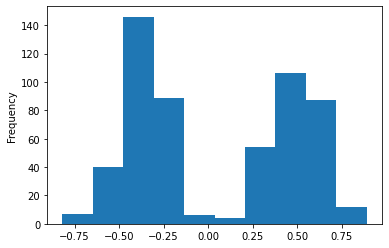

In [7]:
single_congress_df["nominate_dim1"].plot.hist()

We can see here along the first dimension (solely ideological) that in the 116th congress there is a distinctive divide down ideological lines. Most representatives are around 0.5 from the mean of 0.0. The number of representatives in the middle is somehow shockingly low.

<AxesSubplot:ylabel='Frequency'>

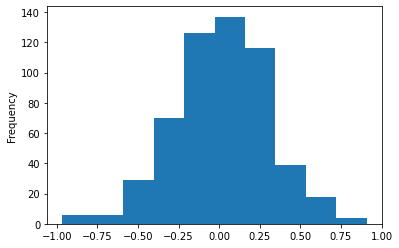

In [8]:
single_congress_df["nominate_dim2"].plot.hist()

Along the second dimension, we can see this just as well. Within party lines, there is not as much division on "lifestyle issues." There is diversity, but judging by the bell curve, there is a trend towards homogeny. This is fairly expected.

### Closing thoughts:

This dataset is interesting as it rates politicians in terms of polarity. Immediately what springs to mind are examining trends over time, when political polarity (extremism) surges, and when it eases. From the graph below, you can see the distace from the mean increase in recent years, while both parties trended closer to the mean during the second world war and through the 60s until the 90s, where both dip away from the mean:

![Alt text](image.png)

Beyond this dataset, I'm interested in how the datasets I've found relate to each other. I was unable to dive into the other two as thoroughly (hence their absence here), but they deal with the same congressional representatives. With more research, I hope to find a way to combine these datasets in some way, or use one to predict values in another. Eventually, I want to create a model based on the data from these datasets (and possily others) to predict quantitative descriptors of representatives in congress. I want to learn from this data in order to describe representatives in a different way, outside of just party lines and the representatives' thick rhetoric. 

This requires extensive data cleaning and parsing, which I'm not ready for yet. My first step after this point will be to continue my explorations into these other datasets, and look for alternatives. Once I've found solid ground, I'll evaluate whether or not I can merge these sets into one dataframe to be analyzed further.